In [1]:
# import des libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train = pd.read_csv('data/train_full.csv')  # on lit le dataset train_full
test = pd.read_csv('data/test_full.csv')    # on lit le dataset test_full

print(train.shape)  # on affiche les dimensions de train
print(test.shape)   # on affiche les dimensions de test

train.columns.values   # on affiche les features de train

(1460, 81)
(1459, 80)


array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [3]:
# On supprime la colonne Id de Train et Test

train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

## 1 - Exploration de la target SalePrice

In [4]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

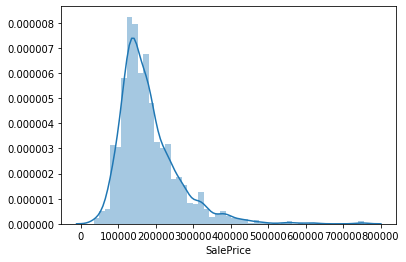

In [5]:
sns.distplot(train['SalePrice'])

In [6]:
# On remarque que la distribution de SalePrice n'est pas equilibrée
# On va donc regarder si une transformation logarythmique peux uniformiser la distribution

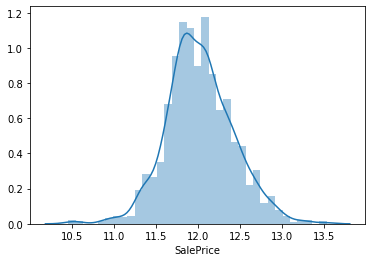

In [7]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'])

In [8]:
# Effectivement, la distribution est bien mieux repartie, et donc bien plus exploitable

## 2 - Séparation des données qualitatives et quantitatives du train set

In [9]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 80, dtype: object

In [10]:
# on va creer un subset qui contient uniquement les 'object' (quali) et un subset avec uniquement les 'float' et 'int' (quanti)

In [11]:
# Subset qualitatif
quali = train.select_dtypes(include=['object']).columns
print(quali)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [12]:
#quanti
quanti = train.select_dtypes(include=['int64','float64']).columns
print(quanti)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [13]:
num_quanti = len(quanti)
num_quali = len(quali)

print((num_quali), "features qualitatives")
print((num_quanti), "features quantitatives")

43 features qualitatives
37 features quantitatives


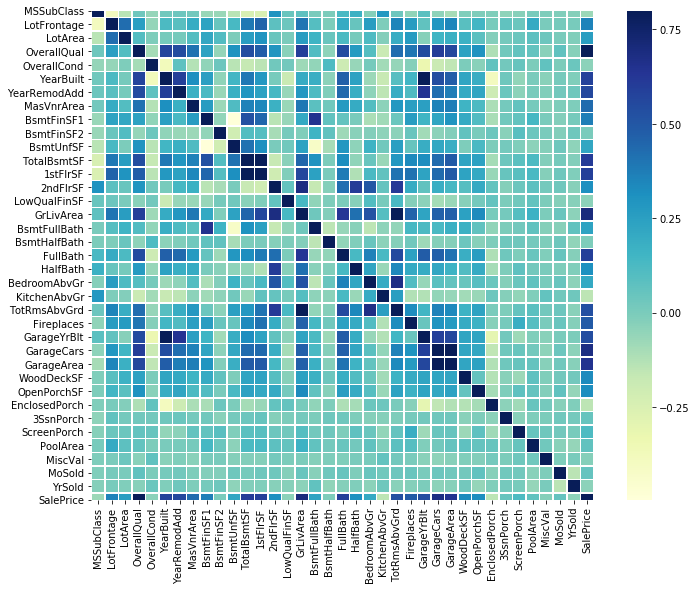

In [14]:
# Analyses des features quantitatives avec le heatmap

corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, linewidths=.5, cmap="YlGnBu");

In [15]:
train[quanti]
correlation = dict()

for x in train[quanti]:
    correlation[x] = round(train[x].corr(train['SalePrice']),2)
    
for key in sorted(corr_output,key = corr_output.get, reverse=True):
    if corr_output[key] >= 0.5:
            print(key, corr_output[key])  
            

# corr_mat de ces 10 features

k = 11
cols = corrmat.nlargest(k,'SalePrice').index
cols 

corr_mat_10 = train[cols].corr()
corr_mat_10

NameError: name 'corr_output' is not defined

## Analyse features numériques

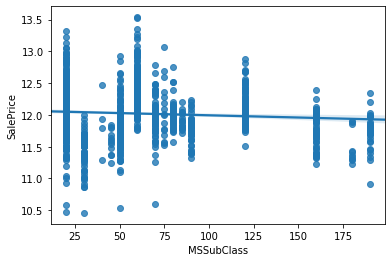

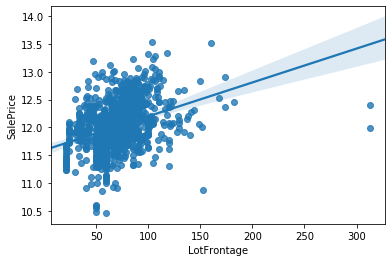

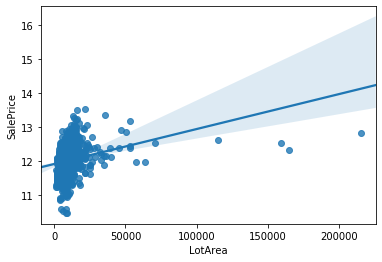

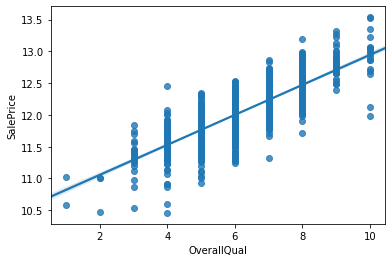

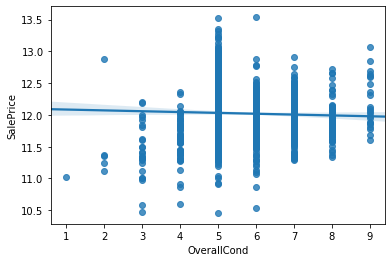

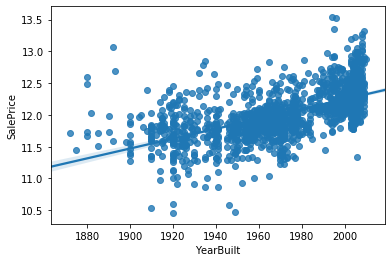

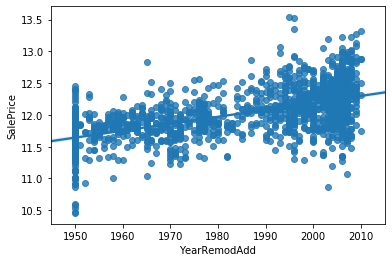

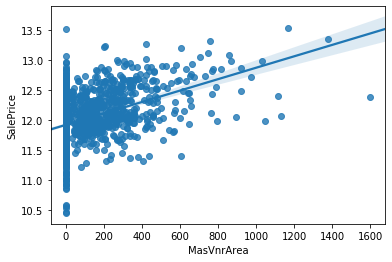

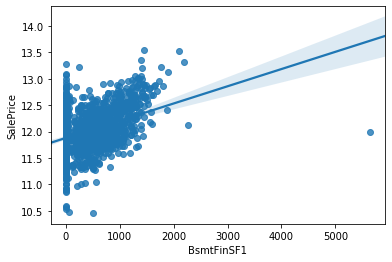

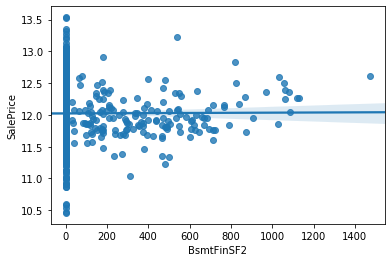

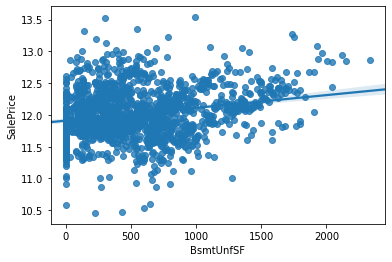

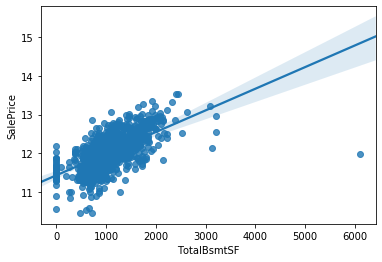

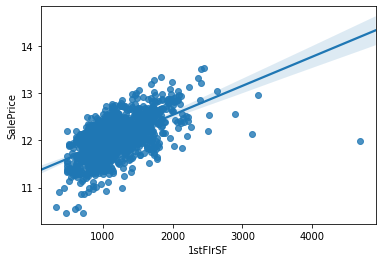

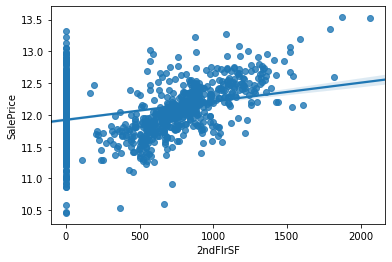

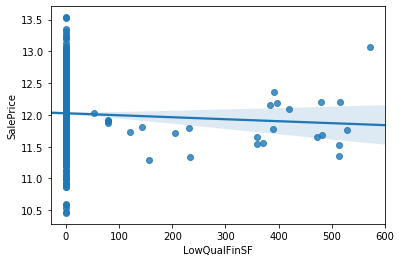

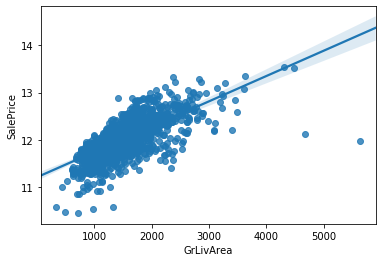

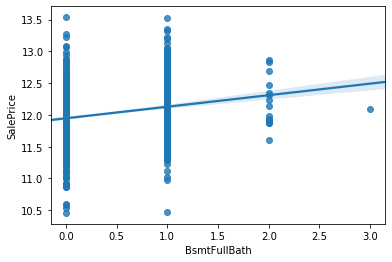

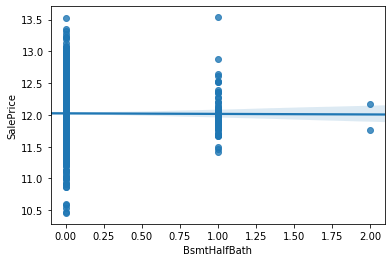

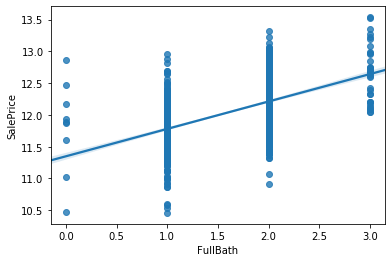

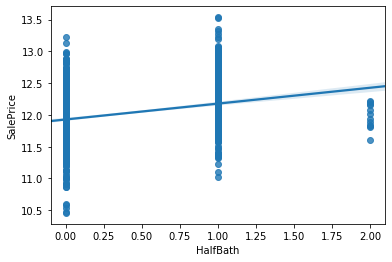

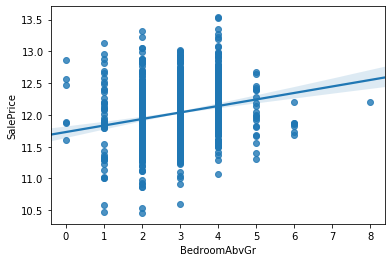

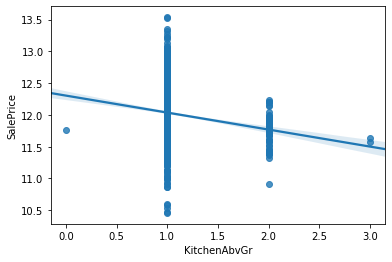

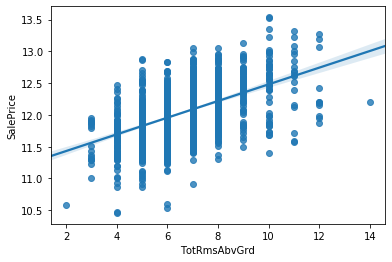

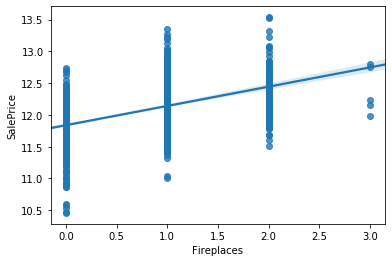

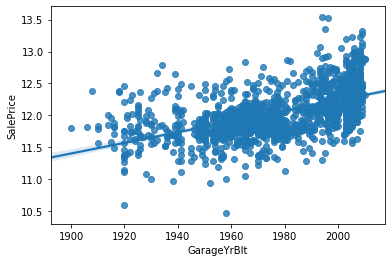

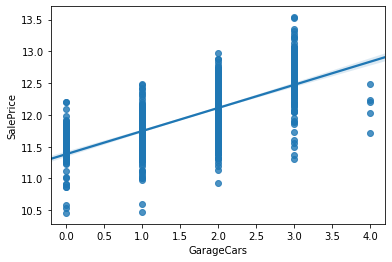

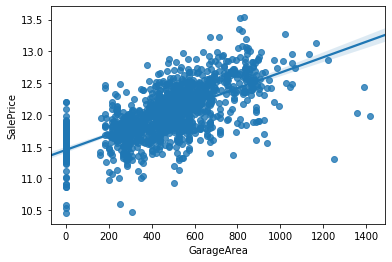

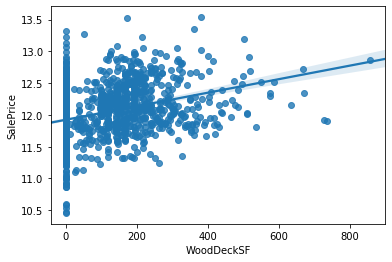

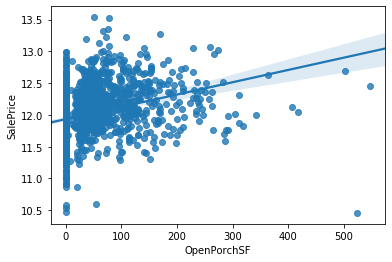

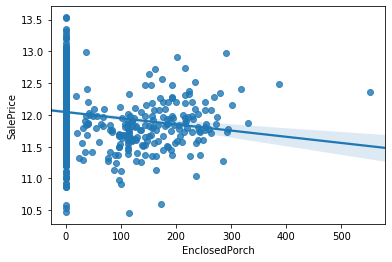

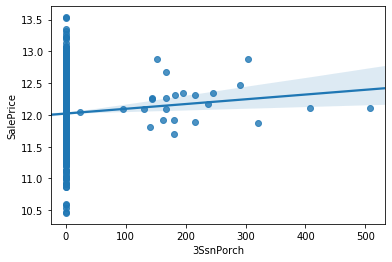

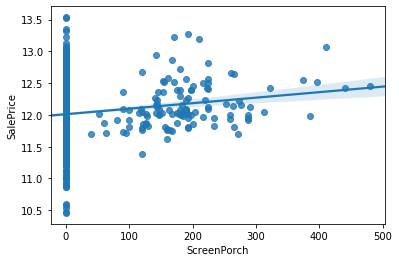

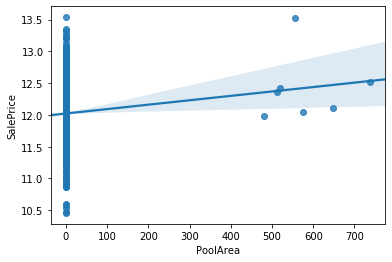

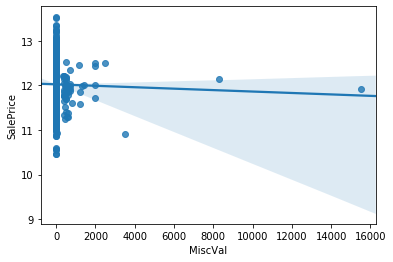

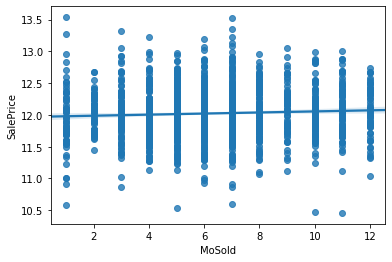

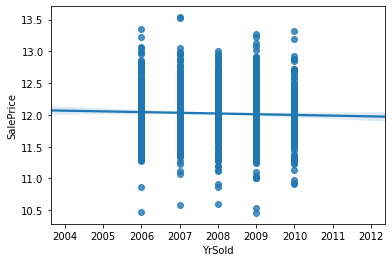

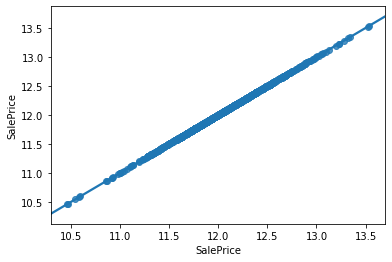

In [17]:
for feature in train[quanti]:
    sns.regplot(x=feature,y='SalePrice', data=train)
    plt.show()

## Elimination des outliers LotFrontage

corr : 0.36


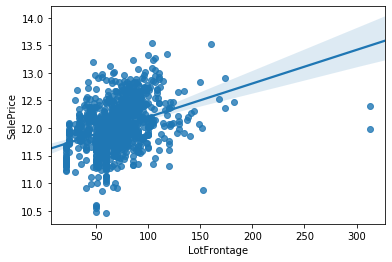

In [18]:
sns.regplot(x='LotFrontage',y='SalePrice', data=train)
print(f"corr : {round(train['LotFrontage'].corr(train['SalePrice']),2)}")

corr : 0.38


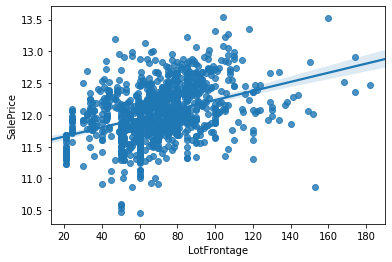

In [19]:
train = train.drop(train[(train['LotFrontage']>300)].index).reset_index(drop=True)
sns.regplot(x='LotFrontage',y='SalePrice', data=train)
print(f"corr : {round(train['LotFrontage'].corr(train['SalePrice']),2)}")

## Elimination des outliers LotArea

corr : 0.26


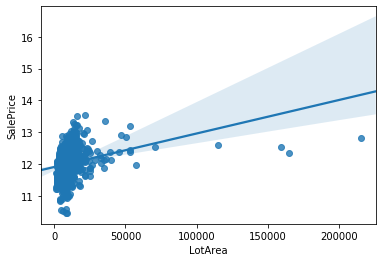

In [20]:
sns.regplot(x='LotArea',y='SalePrice', data=train)
print(f"corr : {round(train['LotArea'].corr(train['SalePrice']),2)}")

corr : 0.37


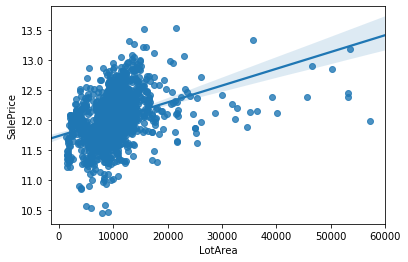

In [21]:
train = train.drop(train[(train['LotArea']>60000)].index).reset_index(drop=True)
sns.regplot(x='LotArea',y='SalePrice', data=train)
print(f"corr : {round(train['LotArea'].corr(train['SalePrice']),2)}")

## Elimination des outliers GarageArea

corr : 0.66


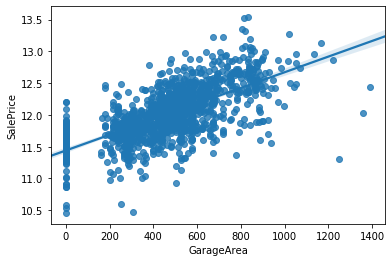

In [22]:
sns.regplot(x='GarageArea',y='SalePrice', data=train)
print(f"corr : {round(train['GarageArea'].corr(train['SalePrice']),2)}")

corr : 0.67


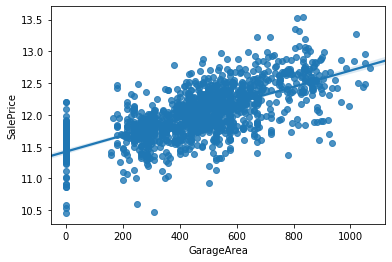

In [23]:
train = train.drop(train[(train['GarageArea']>1100)].index).reset_index(drop=True)
sns.regplot(x='GarageArea',y='SalePrice', data=train)
print(f"corr : {round(train['GarageArea'].corr(train['SalePrice']),2)}")

## Elimination des outliers GarageCars

corr : 0.68


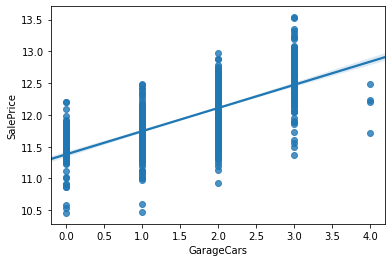

In [24]:
sns.regplot(x='GarageCars',y='SalePrice', data=train)
print(f"corr : {round(train['GarageCars'].corr(train['SalePrice']),2)}")

In [25]:
#etant donné qu'il s'agit d'un feature quantitatif mais d'apparance qualitatif, on essaye une visualisation avec des Boxplots

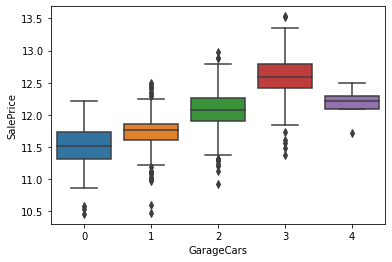

In [26]:
sns.boxplot(x=train['GarageCars'], y=train['SalePrice'])

In [27]:
train = train.drop(train[(train['GarageCars']>3) & (train['SalePrice']<13)].index).reset_index(drop=True)
print(f"corr : {round(train['GarageCars'].corr(train['SalePrice']),2)}")

corr : 0.69


## Elimination des outliers WoodDeckSF

corr : 0.34


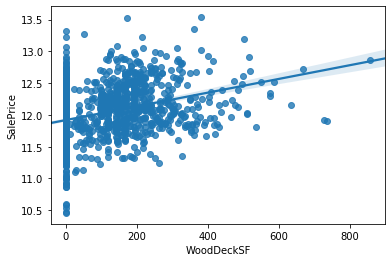

In [28]:
sns.regplot(x='WoodDeckSF',y='SalePrice', data=train)
print(f"corr : {round(train['WoodDeckSF'].corr(train['SalePrice']),2)}")

In [29]:
train = train.drop(train[(train['WoodDeckSF']>600)].index).reset_index(drop=True)
print(f"corr : {round(train['WoodDeckSF'].corr(train['SalePrice']),2)}")

corr : 0.34


## Elimination des outliers OpenPorchSF

corr : 0.32


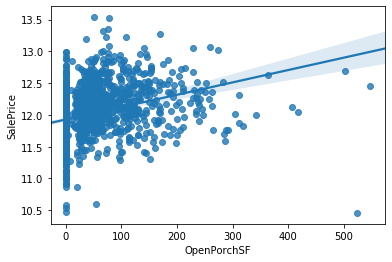

In [30]:
sns.regplot(x='OpenPorchSF',y='SalePrice', data=train)
print(f"corr : {round(train['OpenPorchSF'].corr(train['SalePrice']),2)}")

In [31]:
train = train.drop(train[(train['OpenPorchSF']>500) & (train['SalePrice']<11)].index).reset_index(drop=True)
print(f"corr : {round(train['OpenPorchSF'].corr(train['SalePrice']),2)}")

corr : 0.35


In [32]:
print(train.shape)
print(f"Supression de {1460-1431} outliers")

(1437, 80)
Supression de 29 outliers


## Traitement des valeurs manquantes dans le dataset

In [36]:
# On combine les deux dataset pour faire les modifs en une seule fois

ntrain = train.shape[0]
print(ntrain)
ntest = test.shape[0]
y_train = train.SalePrice.values
y_train.to_csv('Data/y_train.csv')
print(y_train)
datas = pd.concat((train, test)).reset_index(drop=True)
datas.drop(['SalePrice'], axis=1, inplace=True)

print(train.shape)
print(test.shape)
print(datas.shape)

1437


AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

### %Valeurs manquantes dans le dataset

In [ ]:
percnan = round((datas.isnull().sum() / len(datas)) * 100,2)  # toutes les features et leurs nombres de zéros ( % )
percnan = percnan[percnan > 0] # On enleve celles qui n'ont pas de valeurs nulles 
percnan = percnan.sort_values(ascending=False)
missing_values = pd.DataFrame({'Missing Ratio': percnan})
missing_values

In [ ]:
# Exemple pour voir le nombre de NA par features et la distribution des valeurs
print(datas['MSZoning'].isnull().sum())
print(datas['MSZoning'].value_counts())

In [ ]:
datas["PoolQC"] = datas["PoolQC"].fillna("None")
datas["MiscFeature"] = datas["MiscFeature"].fillna("None")
datas["Alley"] = datas["Alley"].fillna("None")
datas["Fence"] = datas["Fence"].fillna("None")
datas["FireplaceQu"] = datas["FireplaceQu"].fillna("None")
datas["LotFrontage"] = datas.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    datas[col] = datas[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    datas[col] = datas[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    datas[col] = datas[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    datas[col] = datas[col].fillna('None')
    
datas["MasVnrType"] = datas["MasVnrType"].fillna("None")
datas["MasVnrArea"] = datas["MasVnrArea"].fillna(0)
datas['MSZoning'] = datas.groupby("Neighborhood")['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
datas["Functional"] = datas["Functional"].fillna("Typ")
datas['Electrical'] = datas['Electrical'].fillna(datas['Electrical'].mode()[0])
datas['KitchenQual'] = datas['KitchenQual'].fillna(datas['KitchenQual'].mode()[0])
datas['Exterior1st'] = datas['Exterior1st'].fillna(datas['Exterior1st'].mode()[0])
datas['Exterior2nd'] = datas['Exterior2nd'].fillna(datas['Exterior2nd'].mode()[0])
datas['SaleType'] = datas['SaleType'].fillna(datas['SaleType'].mode()[0])
datas['MSSubClass'] = datas['MSSubClass'].fillna("None")

In [ ]:
# datas = datas.drop(['Utilities'], axis=1)

In [ ]:
# On verifie qu'il n'y ai plus de Na dans le dataset

percnan = round((datas.isnull().sum() / len(datas)) * 100,2)  # toutes les features et leurs nombres de zéros ( % )
percnan = percnan[percnan > 0] # On enleve celles qui n'ont pas de valeurs nulles 
percnan = percnan.sort_values(ascending=False)
missing_values = pd.DataFrame({'Missing Ratio': percnan})
missing_values

# Modification des features contenant des valeurs String

In [ ]:
#Transformation des valeurs string "hierarchisables"
# on utilise .map pour cette etape

datas.Alley = datas.Alley.map({'None':0, 'Grvl':1, 'Pave':2})
datas.BsmtCond =  datas.BsmtCond.map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.BsmtExposure = datas.BsmtExposure.map({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
datas['BsmtFinType1'] = datas['BsmtFinType1'].map({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
datas['BsmtFinType2'] = datas['BsmtFinType2'].map({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
datas.BsmtQual = datas.BsmtQual.map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.ExterCond = datas.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.ExterQual = datas.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.FireplaceQu = datas.FireplaceQu.map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.Functional = datas.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
datas.GarageCond = datas.GarageCond.map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.GarageQual = datas.GarageQual.map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.HeatingQC = datas.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.KitchenQual = datas.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
datas.LandSlope = datas.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
datas.PavedDrive = datas.PavedDrive.map({'N':1, 'P':2, 'Y':3})
datas.PoolQC = datas.PoolQC.map({'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
datas.Street = datas.Street.map({'Grvl':1, 'Pave':2})
datas.Fence = datas.Fence.map(({'None':0 ,'MnWw':1 ,'GdWo':2, 'MnPrv':3}))
datas.GarageFinish = datas.GarageFinish.map(({'None':0 ,'Unf':1 ,'RFn':2, 'Fin':3}))
datas.LotShape = datas.LotShape.map(({'IR3':0 ,'IR3':1 ,'IR1':2, 'Reg':3}))
datas.CentralAir = datas.CentralAir.map(({'N':0 ,'Y':1}))
datas.MSSubClass = datas.MSSubClass.map({20:'class1', 30:'class2', 40:'class3', 45:'class4',
                                   50:'class5', 60:'class6', 70:'class7', 75:'class8',
                                   80:'class9', 85:'class10', 90:'class11', 120:'class12',
                                   150:'class13', 160:'class14', 180:'class15', 190:'class16'})

In [ ]:
num_quan_data = len(datas.select_dtypes(include=['int64','float64']).columns)
num_qual_data = len(datas.select_dtypes(include=['object']).columns)

print(f"{num_quan_data} features quantitatives & {num_qual_data} features qualitatives")

In [ ]:
# quali
qual_data = datas.select_dtypes(include=['object']).columns
print(qual_data)

In [ ]:
print(datas.shape)

In [ ]:
# remplacement des valeurs Quali restantes avec la fonction Dummies 

dummy_drop=[]
for i in qual_data:
    dummy_drop += [i+'_'+str(datas[i].unique()[-1])] # Rajoute dans une liste la derniere valeur de chaque features ex:
    # Sexe : Homme ou Femme , va rajouter dans dummy_drop Femme
    
# create dummy variables
datas = pd.get_dummies(datas,columns=qual_data) 
# drop the last column generated from each categorical feature
datas = datas.drop(dummy_drop,axis=1)

In [ ]:
print(datas.shape)

In [ ]:
train = datas[:ntrain]
test = datas[ntrain:]

In [ ]:
print(train.shape)
print(test.shape)

(1444, 80)
(1459, 79)

In [ ]:
train.to_csv("data/trainprep.csv")
test.to_csv("data/testprep.csv")